<a href="https://colab.research.google.com/github/mai890107/mai890107/blob/main/Inverse_Fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
import time as ttime
import random
from mpl_toolkits.mplot3d import Axes3D

In [76]:
# create the signal
srate  = 1000 # hz
time   = np.arange(0,2.,1/srate)

pnts   = len(time) # number of time points
signal = 2.5 * np.sin( 2*np.pi*4*time ) + 1.5 * np.sin( 2*np.pi*6.5*time )


# prepare the Fourier transform
fourTime = np.array(np.arange(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)


2000


In [49]:
def dft(signal):
    N = len(signal)  # Number of time points length
    fourier_coeffs = np.zeros(N, dtype=complex)
    time =  np.array(range(N))/N # time vector

 # Loop over frequencies to compute each specifies frequencies fourier coffeient
    for k in range(N):

        csw = np.exp( -1j*2*np.pi*k*time ) #create complex csw
        fourier_coeffs[k] = np.dot(signal, csw) # doing inner dot between signal and csw

    return fourier_coeffs

fourier_coeffs = dft(signal)



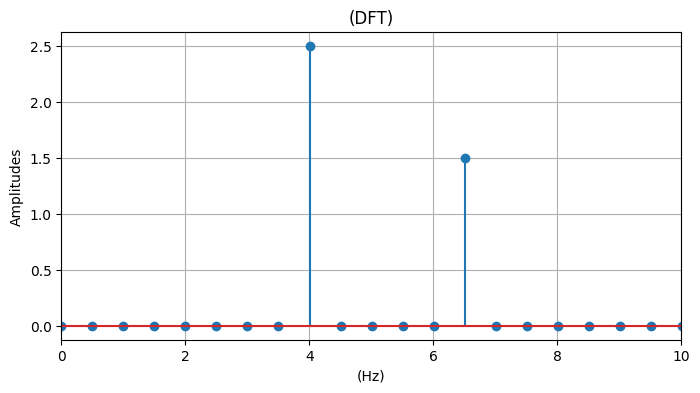

In [ ]:

#*** Fourier 係數正規化 ，避免Fourier係數受採樣點而改變
fourier_coeffs_normalize = np.abs(fourier_coeffs)/pnts
# 計算振幅頻譜
amplitudes = 2 * np.abs(fourier_coeffs_normalize[:pnts//2])  # 只保留正頻率部分
hz = np.linspace(0, srate/2, pnts//2)  # 頻率軸

# 計算振幅頻譜
amplitudes = 2 * np.abs(fourier_coeffs_normalize[:pnts//2])  # 只保留正頻率部分
hz = np.linspace(0, srate/2, pnts//2)  # 頻率軸

# 繪製頻譜圖
plt.figure(figsize=(8, 4))
plt.stem(hz, amplitudes)  # 移除 use_line_collection=True

plt.xlabel('(Hz)')
plt.ylabel('Amplitudes')
plt.title('(DFT)')
plt.xlim(0, 10)  # 只顯示 0-10 Hz 的範圍
plt.grid()
plt.show()



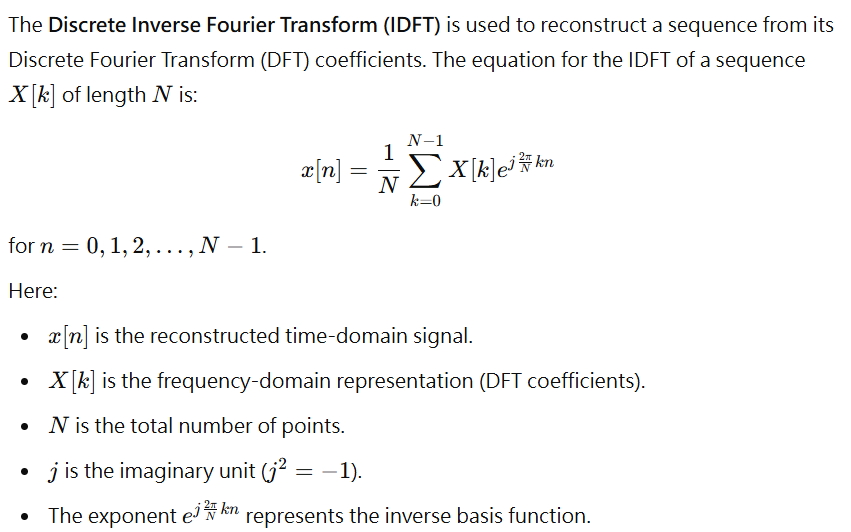

In [73]:
def inverse_FT(ft_signal):
    N = len(ft_signal)  # Number of time points length
    time = np.arange(N) / N
    reconSignal = np.zeros(N, dtype=complex)

    for k in range(0, pnts):
        csw = ft_signal[k] * np.exp(1j * 2 * np.pi * k * time)
        reconSignal = reconSignal + csw

    return reconSignal



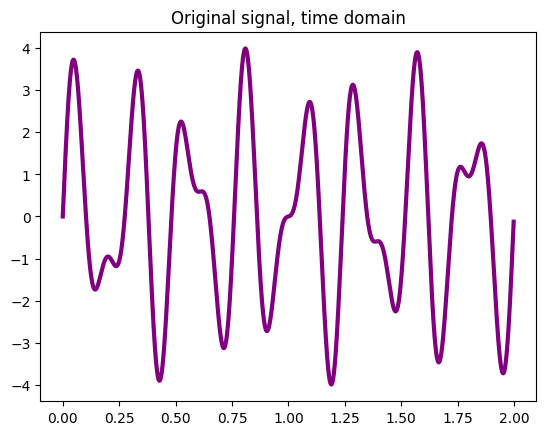

In [85]:
plt.plot(time, signal, linewidth=3,color ='purple')
plt.title('Original signal, time domain')
plt.show()

<ipython-input-87-9ec0ba21daf7>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


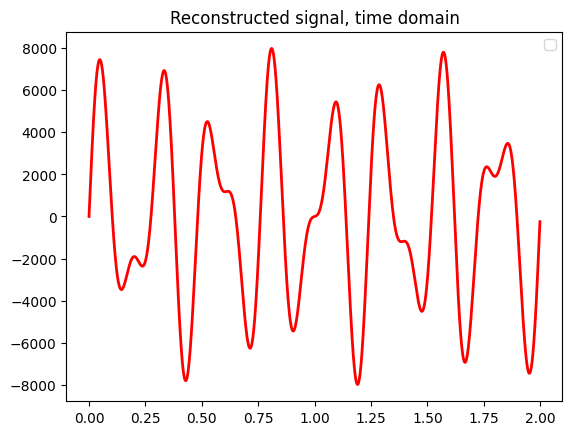

In [87]:
dft_signal = dft(signal)
reconSignal=inverse_FT(dft_signal)
plt.plot(time, np.real(reconSignal), linewidth=2,color = 'red')
plt.title('Reconstructed signal, time domain')

plt.legend()
plt.show()

Bandpass Filter

In [68]:
# simulation params
srate = 1000
time  = np.arange(0,2-1/srate,1/srate)
pnts  = len(time)
# signal
signal_complexed = np.sin(2*np.pi*4*time) + np.sin(2*np.pi*10*time)

#fourier 轉換
fourier_coeffs = dft(signal_complexed)
fourier_coeffs = (fourier_coeffs)/pnts
amplitudes2 = 2 * np.abs(fourier_coeffs[:pnts//2])  # 只保留正頻率部分
hz = np.linspace(0, srate/2, pnts//2)  # 頻率軸

#fourier 反轉換
filtered_coeffs = fourier_coeffs.copy()

#找出10Hz的 Index then replace it turn to 0
freqidx = np.argmin(np.abs(hz-10))
filtered_coeffs[freqidx] = 0
filtered_coeffs[-freqidx] = 0  #
reconMod = inverse_FT(filtered_coeffs)






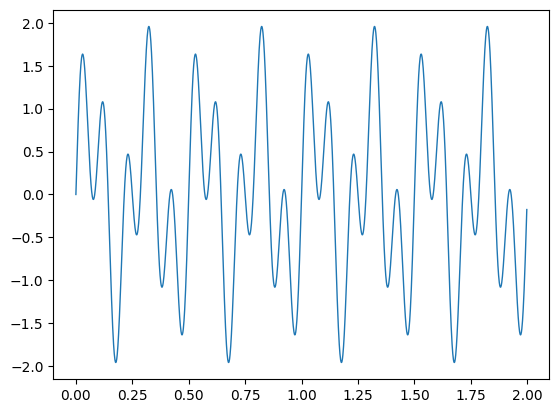

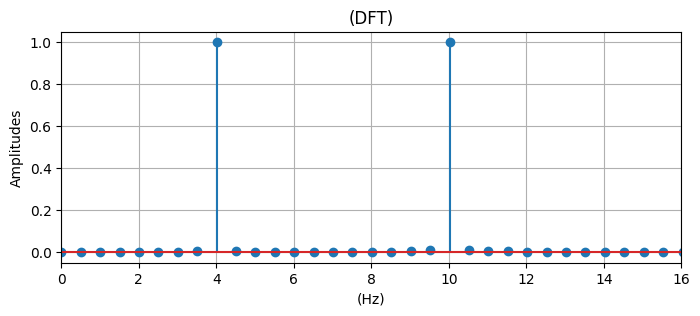

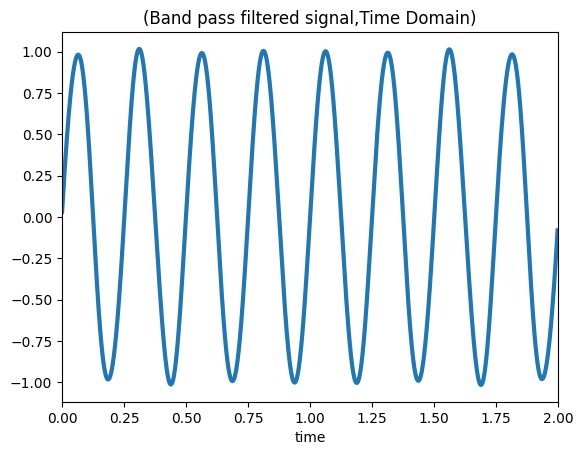

In [69]:
#時域圖
plt.plot(time,signal_complexed,linewidth=1)
#頻譜圖
plt.figure(figsize=(8, 3))
plt.stem(hz, amplitudes2)  # 移除 use_line_collection=True

plt.xlabel('(Hz)')
plt.ylabel('Amplitudes')
plt.title('(DFT)')
plt.xlim(0, 16)  # 只顯示 0-16 Hz 的範圍
plt.grid()
plt.show()

# band pass filter time domain
plt.plot(time,np.real(reconMod),linewidth=3)
plt.xlabel('time')
plt.xlim(0,2)
plt.title('(Band pass filtered signal,Time Domain)')
plt.show()
